In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# carregar o dataset
df_salario = pd.read_csv('./datasets/dataset_salario.csv')
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [3]:
# copiar o Dataframe para realização de EDA
df_salario_eda = df_salario.copy()

In [4]:
# copiar o Dataframe para realização de Bucketing
df_salario_bucketing = df_salario.copy()

## EDA

In [5]:
df_salario_eda.head()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20


In [6]:
# detectar valores ausentes
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [7]:
# Medidas estatísticas
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

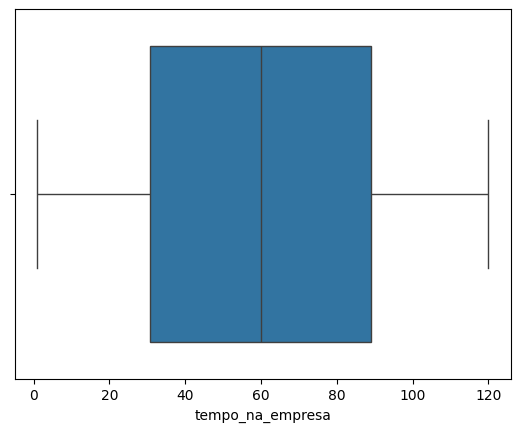

In [8]:
# verificar / detectar outliers
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

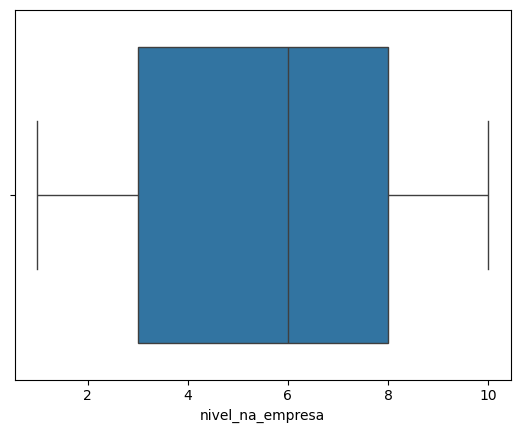

In [9]:
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

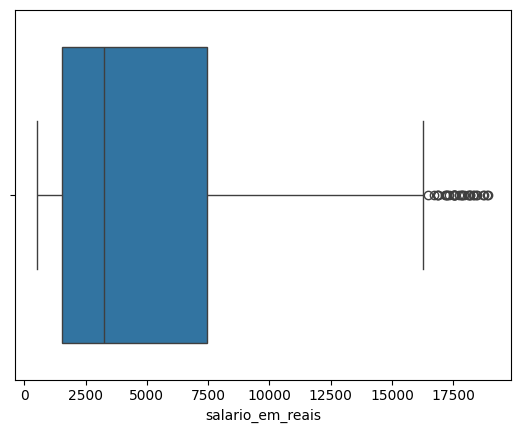

In [10]:
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

os outliers são vários, porém fazem sentido (salários mais altos de cargos de gestão, por exemplo, costumam ser mais raros e mais bem pagos).

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

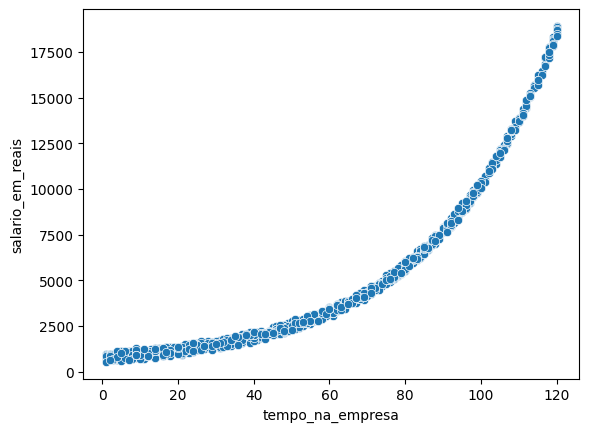

In [47]:
# cruzamento de variáveis numéricas com salário em reais (variável dependente)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

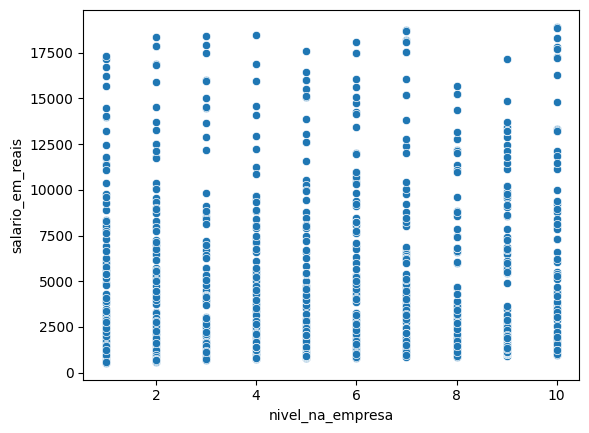

In [12]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

o nível na empresa não representa um ponto influente sobre o salário em reais, pois temos salários baixos e altos em todos os níveis

<Axes: xlabel='tempo_na_empresa', ylabel='nivel_na_empresa'>

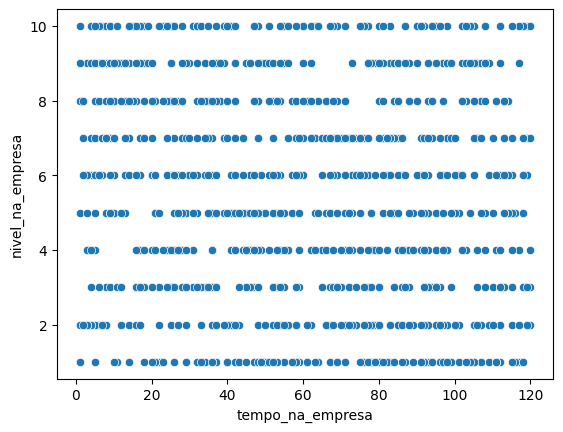

In [13]:
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='nivel_na_empresa')

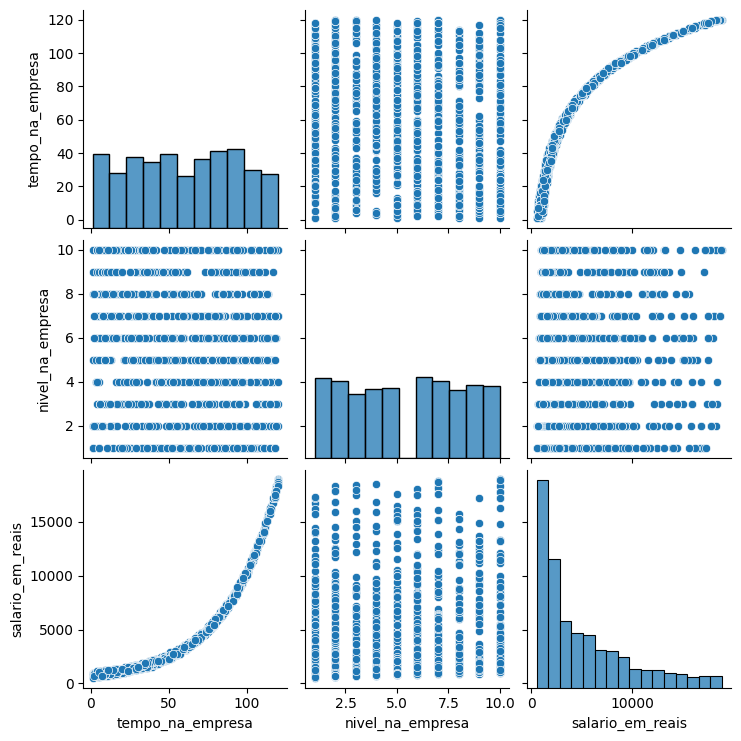

In [14]:
# histogramas das variáveis
sns.pairplot(df_salario_eda)

resultado: quanto mais tempo a pessoa fica na empresa, mais o salário dela aumenta (de forma aproximadamente exponencial)

<Axes: >

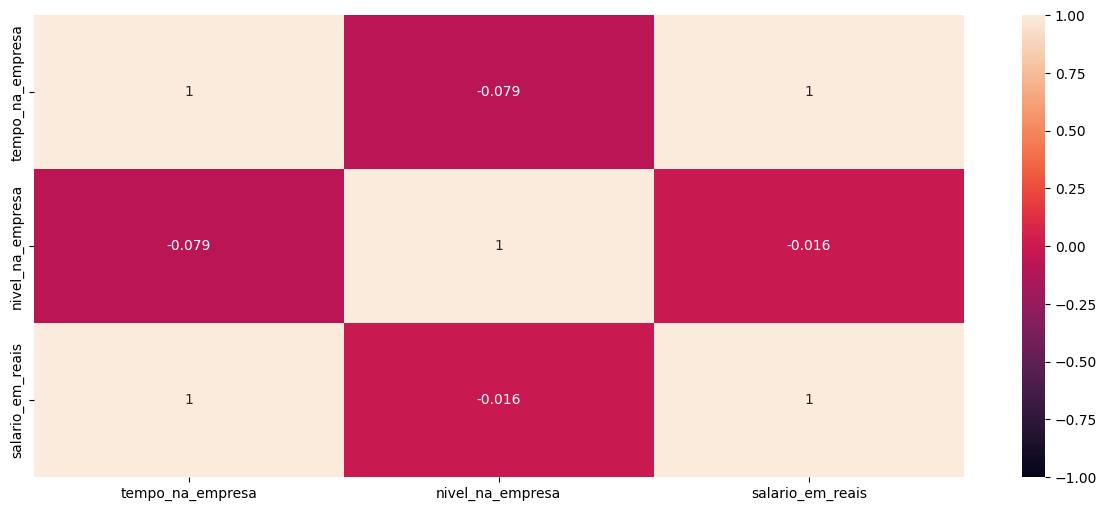

In [15]:
# mapa de calor com Spearman (que analisa correlação não linear; Pearson não conseguiria determinar a correlação tão precisamente)
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

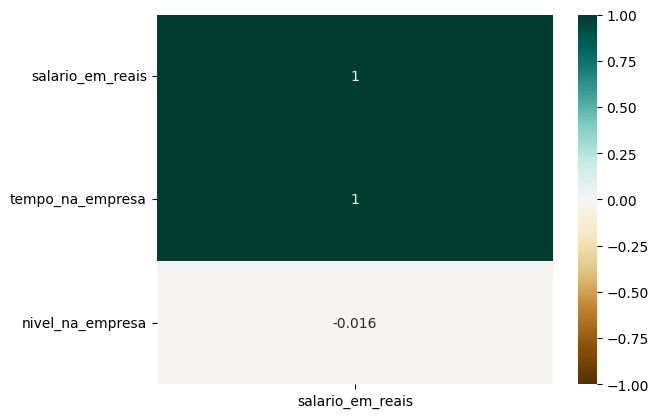

In [16]:
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [17]:
# bucketing - tempo de casa
bins_tempo_casa = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
labels_tempo_casa = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_casa, labels=labels_tempo_casa, include_lowest=True)
df_salario_bucketing

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
...,...,...,...,...
995,5,10,1037.35,0-9
996,7,2,668.01,0-9
997,118,6,17511.13,110-119
998,94,10,8938.96,90-99


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

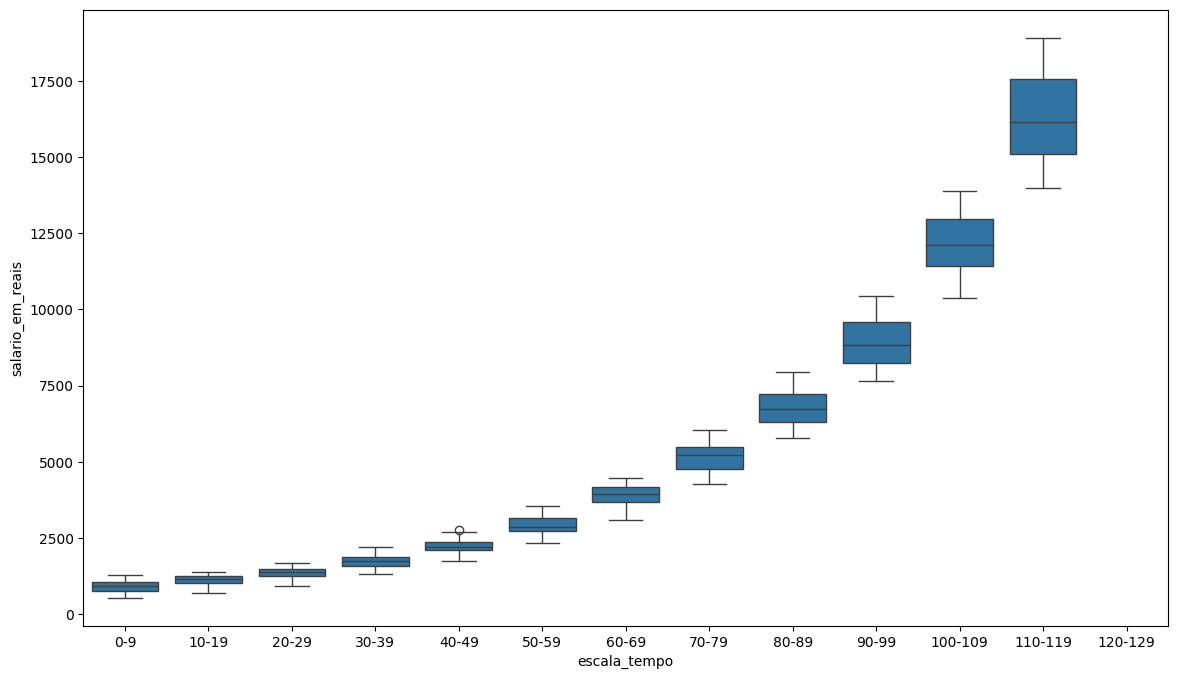

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

## Treinamento de modelo linear

In [19]:
# importar bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [20]:
# criar o dataset de treino e teste
X = df_salario.drop(columns=['salario_em_reais'], axis=1)
y = df_salario['salario_em_reais']

In [21]:
# split usando kfold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [ ]:
# bloco para treinamento do modelo
# pipeline
# padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

# nomes das colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# transformer para colunas numéricas
transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# criar um column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

# pipeline principal = pré-processamento + treinamento
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# armazenar RMSE de treino e teste
# se o erro de teste for maior do que o erro de treino, temos overfitting
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# armazenar R2 Score de teste
r2score_fold_test = []

# armazenar resíduos
residuos = []

# armazenar predições
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # treinar o modelo
    model_regr.fit(X_train, y_train)

    # fazer predições nos conjuntos de treinamento e teste
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # calcular o RMSE para os conjuntos de treinamento e teste
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    # calcular R2Score e resíduos para os conjuntos de teste
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # armazenar métricas
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

## Análise de métricas do modelo linear

In [23]:
# métricas 
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final*100}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 1882.8318426651392
RMSE Teste: 1886.4504221336076
% Dif. RMSE Treino e Teste: 0.19218813844503052
R2Score Teste: 0.8261178870584761


como a diferença entre os RMSE de treino e teste é mínima (4 reais), não podemos afirmar que houve um overfitting

## Análise de resíduos - modelo linear

In [24]:
# transformar resíduos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos_std

array([ 5.95616525e-01, -7.24916727e-01, -6.46846433e-01,  8.64095533e-01,
       -5.33806156e-02, -7.61704833e-01,  6.80947606e-01,  1.45661295e+00,
        3.15407488e-01, -5.85616590e-01,  1.29483240e-01,  8.62850152e-01,
       -8.81408422e-01, -2.57676835e-01, -3.98447700e-01,  4.84215194e-01,
       -9.30147928e-01, -1.98427398e-01,  2.09007896e-01, -9.04965560e-01,
       -6.81287606e-02, -8.34446292e-01, -3.95656924e-01,  1.85180868e-01,
       -8.59767063e-01, -1.16014546e+00, -9.89137623e-01,  1.98282340e+00,
       -7.09136535e-01, -5.86755306e-01,  2.97904569e+00,  3.41834809e-01,
       -1.07716414e+00,  1.30248304e+00, -5.99662310e-01, -4.35883427e-01,
       -5.78726106e-01, -1.02611646e+00,  3.62850210e-01,  1.01353539e+00,
       -3.51902591e-01,  9.50243614e-01,  1.10020428e+00,  3.93453210e-01,
       -8.28856918e-02, -2.86114598e-01, -1.14814701e+00, -7.64435745e-01,
       -2.96268121e-01, -9.37004031e-01, -5.80106334e-01,  4.60575328e-02,
       -2.64983022e-01,  

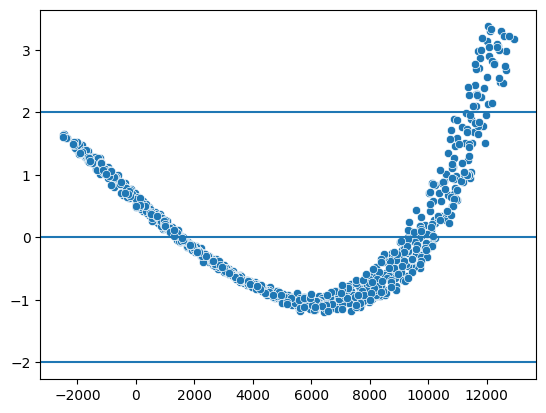

In [25]:
# verificar linearidade dos resíduos: valores entre -2 e +2 (escala padrão)
# verificar homocedasticidade: valores em torno da reta sem nenhuma tendência ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

muitos valores fogem da margem +2, e há tendência de formato, ou seja, não há linearidade nem homocedasticidade

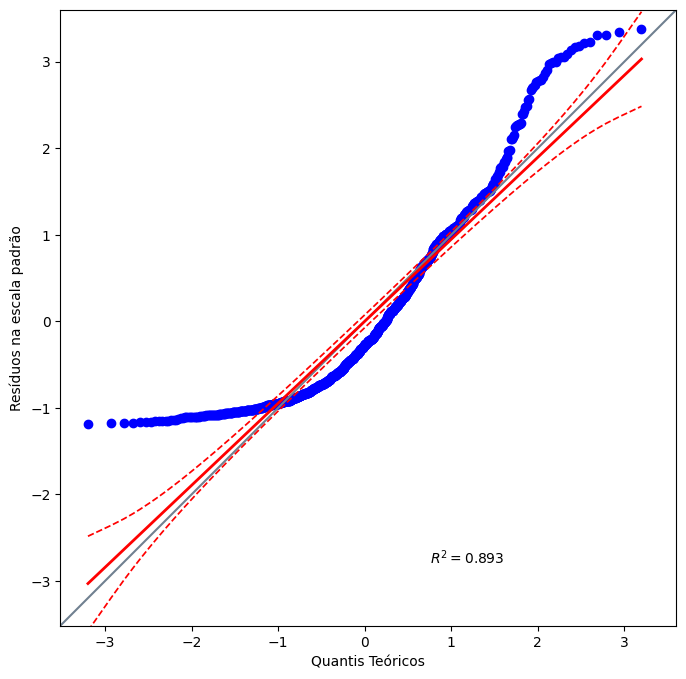

In [26]:
# checar se resíduos seguem uma distribuição normal
# qqplot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [27]:
# teste de normalidade - shapiro-wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
stat_shapiro, p_value_shapiro

(0.891969217965228, 7.013497918013492e-26)

In [28]:
# teste de normalidade - shapiro-wilk
stat_ks, p_value_ks = kstest(residuos, 'norm')
stat_ks, p_value_ks

(0.5939999999999955, 0.0)

In [29]:
# teste de normalidade - shapiro-wilk
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
stat_ll, p_value_ll

(0.11825983774680088, 0.0009999999999998899)

em todos os testes de normalidade, o p-value resultou em um valor menor que 0.05 (convenção), ou seja, não encaixa na distribuição normal
- h0 eliminado
- h1 aceito

## Treinando modelo polinomial

In [30]:
# exemplo de criação de features polinomiais
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [31]:
# criar features com base em polinômios para dar mais repertório para o modelo
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [32]:
# split usando kfold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [ ]:
# bloco para treinamento do modelo

graus_polynomial = [1,2,3,4,5,6,7,8,9,10]
# graus_polynomial = [4]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# split usando kfold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:
    # pipeline
    # padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

    # nomes das colunas
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    # transformer para colunas numéricas
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # criar um column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas)
        ]
    )

    # criar features polinomiais
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # pipeline principal = pré-processamento + treinamento
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', poly_feat),
        ('regressor', LinearRegression())
    ])

    # armazenar RMSE de treino e teste
    # se o erro de teste for maior do que o erro de treino, temos overfitting
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # armazenar R2 Score de teste
    r2score_fold_test = []

    # armazenar resíduos
    residuos = []

    # armazenar predições
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # treinar o modelo
        model_poly.fit(X_train, y_train)

        # fazer predições nos conjuntos de treinamento e teste
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # calcular o RMSE para os conjuntos de treinamento e teste
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        # calcular R2Score e residuos para os conjuntos de teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # armazenar métricas
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

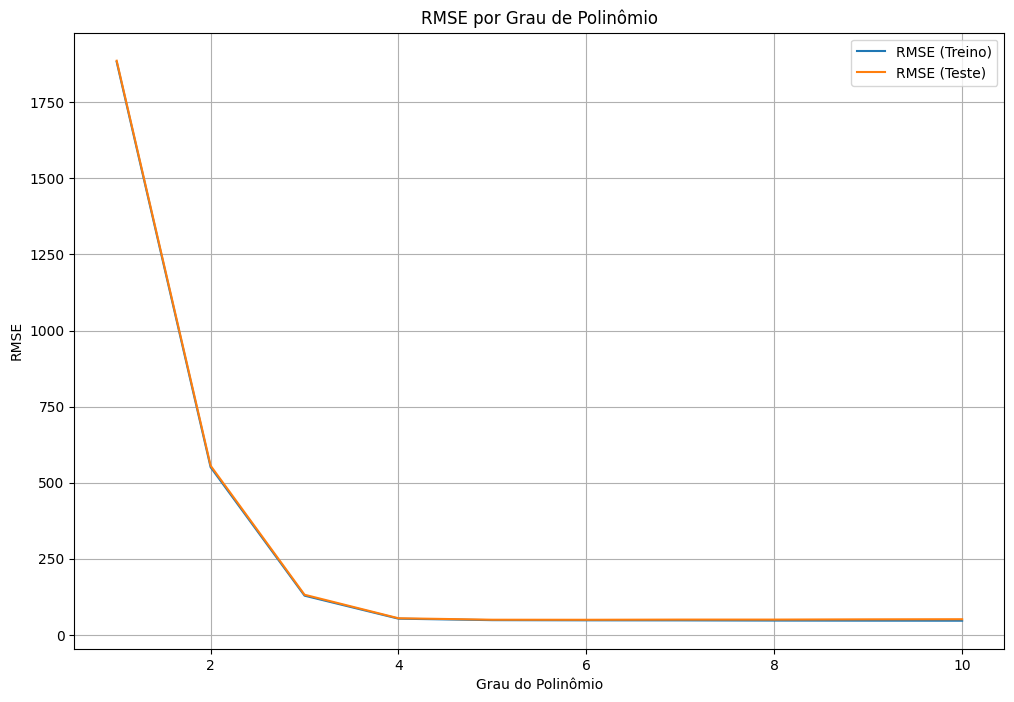

In [50]:
# plotar gráfico para comparar RMSE dos graus de polinômios utilizados
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau de Polinômio')
plt.legend()
plt.grid(True)
plt.show()

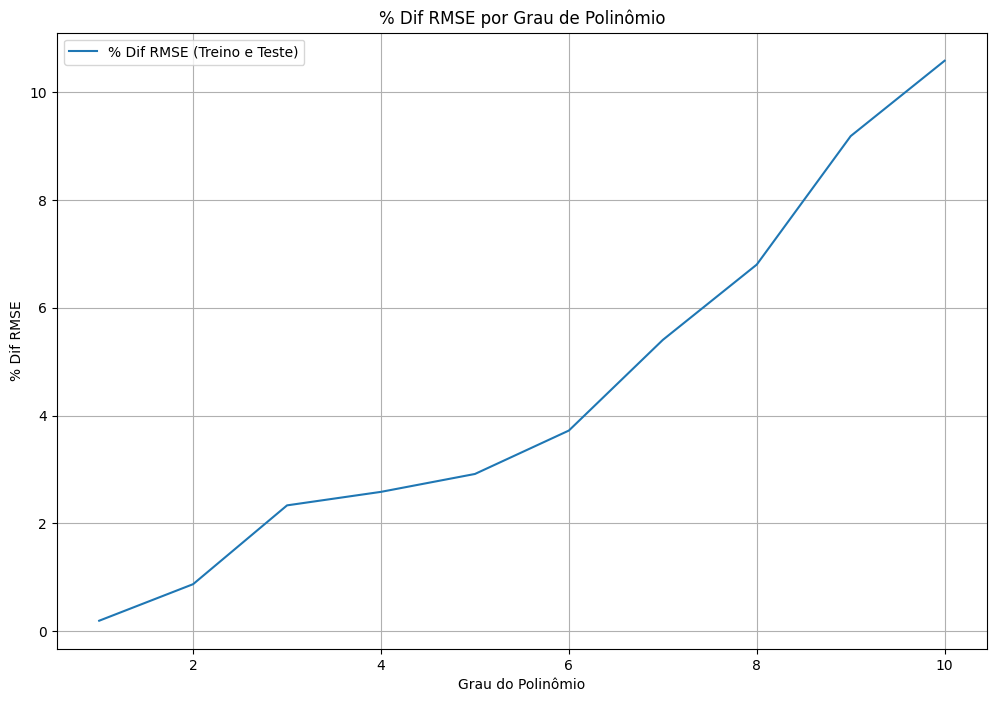

In [51]:
# plotar gráfico para comparar % de diferença de RMSE (Treino e Teste)
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label='% Dif RMSE (Treino e Teste)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por Grau de Polinômio')
plt.legend()
plt.grid(True)
plt.show()

- gráfico 1: observamos que do grau 4 em diante, o erro em números absolutos se estabiliza
- gráfico 2: observamos que o percentual de erro cresce proporcionalmente ao grau do polinômio
- conclusão: o grau 4 parece o grau de polinômio ideal, visto que é o grau onde o erro se estabilizou, e é o grau mais baixo no percentual de erro

## Análise de métricas - modelo polinomial

In [52]:
# métricas 
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 46.6019301139663
RMSE Teste: 51.53555414803831
% Dif. RMSE Treino e Teste: 10.586737549296132
R2Score Teste: 0.9998687442605195


## Análise de resíduos - modelo polinomial

In [53]:
# transformar resíduos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos_std

array([-9.65953852e-01,  8.97073913e-02,  2.69886784e-01,  6.23710243e-01,
       -1.81223496e+00, -1.68953607e+00,  2.71643000e-02, -1.14452725e+00,
        7.93354486e-01, -1.24289577e+00, -4.26390516e-01,  4.33716937e-01,
        1.68585016e+00, -1.89981750e+00, -1.07310765e+00,  1.72628643e-01,
        1.81563320e+00, -3.30369594e-01, -8.30024671e-01,  3.59818855e-02,
       -8.70742567e-01,  2.28637245e-01, -2.35021444e-01,  3.80110866e-01,
       -4.34915359e-01, -2.41399667e+00,  2.83424583e-01,  2.91247435e-01,
        2.04418404e+00, -1.12286768e+00, -2.28316462e-01, -6.42014596e-02,
       -1.23266685e+00,  5.60229746e-01,  1.80094314e-01,  2.50949962e-01,
        9.74438891e-02,  1.10414330e+00, -1.93795148e+00, -4.59798515e-01,
        1.48869347e+00,  8.54133503e-02, -1.05467810e+00, -8.17457683e-01,
        4.69690032e-01, -1.06225624e+00,  3.03282150e-01,  1.67592345e+00,
       -2.29922921e+00,  1.36659339e+00,  4.69083990e-02,  2.23818187e+00,
       -3.06706155e-01,  

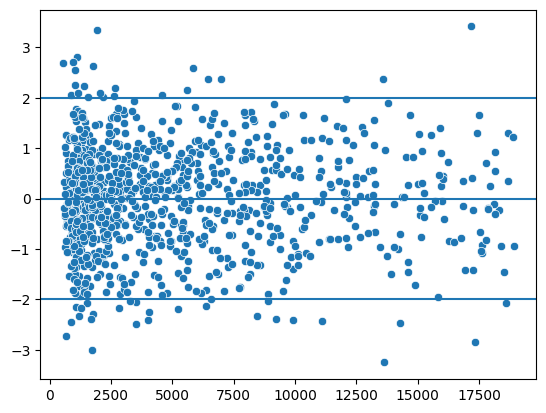

In [54]:
# verificar linearidade dos resíduos: valores entre -2 e +2 (escala padrão)
# verificar homocedasticidade: valores em torno da reta sem nenhuma tendência ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

muitos valores fogem das margens +2 e -2, mas não há tendência de formato, ou seja, há homocedasticidade

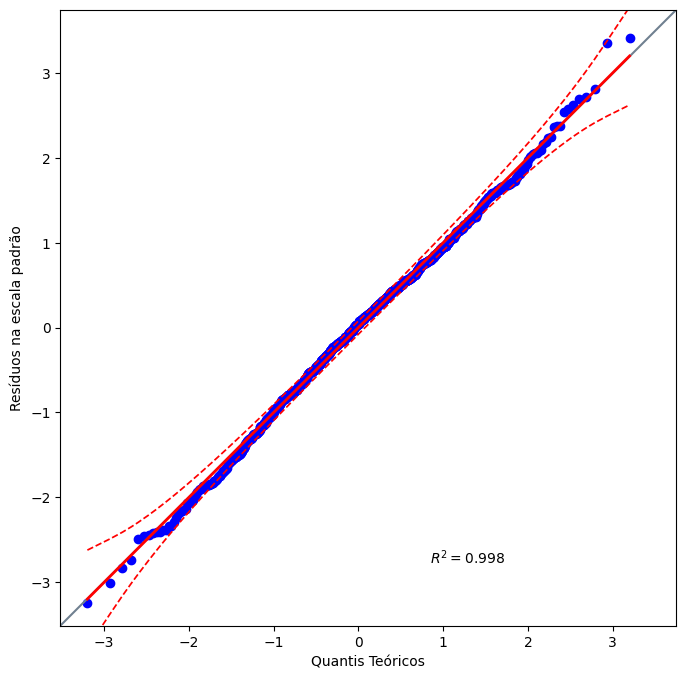

In [55]:
# checar se resíduos seguem uma distribuição normal
# qqplot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [40]:
# teste de normalidade - shapiro-wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)
stat_shapiro, p_value_shapiro

(0.9986951372205322, 0.6852797159659514)

In [41]:
# teste de normalidade - shapiro-wilk
stat_ks, p_value_ks = kstest(residuos, 'norm')
stat_ks, p_value_ks

(0.48237446499530856, 1.2202460106524514e-214)

In [42]:
# teste de normalidade - shapiro-wilk
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
stat_ll, p_value_ll

(0.013637346894986191, 0.9566270022044506)

em 2 dos 3 testes de normalidade, o p-value resultou em um valor maior que 0.05 (convenção), ou seja, encaixa na distribuição normal
- h0 mantido

## Predições individuais

In [43]:
input_features = {
    'tempo_na_empresa': 80,
    'nivel_na_empresa': 10
}

pred_df = pd.DataFrame(input_features, index=[1])
pred_df

,tempo_na_empresa,nivel_na_empresa
1,80,10


In [44]:
# predição
model_poly.predict(pred_df)

array([5977.64164035])

In [45]:
import joblib

In [46]:
# salvar modelo
joblib.dump(model_poly, './modelo_salario.pkl')

['./modelo_salario.pkl']